# Normalization


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df =pd.read_csv("wine_data.csv" , usecols= [0,1,2],names=['Class label', 'Alcohol', 'Malic acid'])
df.sample(3)

,Class label,Alcohol,Malic acid
92,2,12.69,1.53
56,1,14.22,1.70
61,2,12.64,1.36


/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

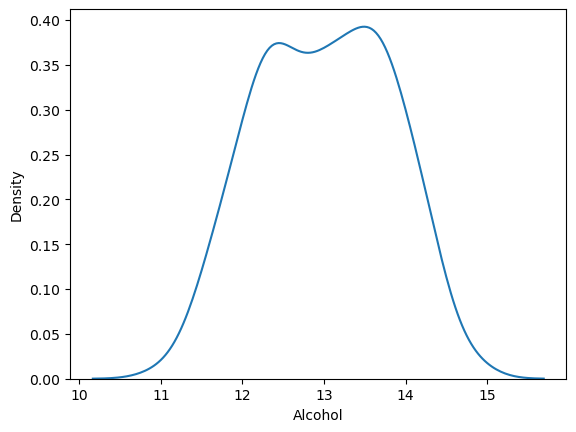

In [6]:
sns.kdeplot(df.Alcohol)

In [10]:
df.Alcohol.skew

<bound method Series.skew of 0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64>

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

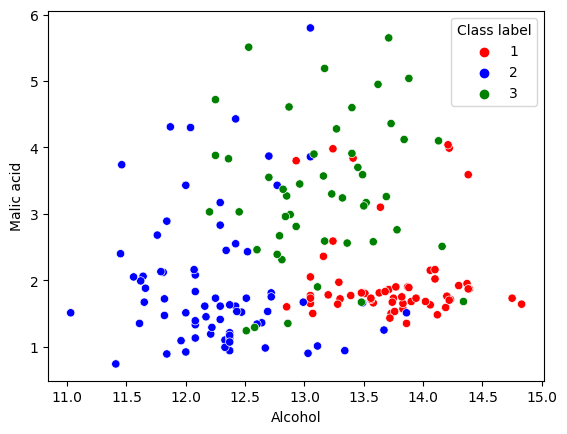

In [13]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data = df, x= 'Alcohol',y = 'Malic acid',hue=df['Class label'],palette=color_dict)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis = 1),
                                                 df['Class label'],
                                                 test_size=0.3,
                                                 random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
#                                                     df['Class label'],
#                                                     test_size=0.3,
#                                                     random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

# MinMax Normalization -Scalled the values between 0,1

In [28]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()

In [29]:
mn.fit(X_train)
X_train_scalled = mn.transform(X_train)
X_test_scalled = mn.transform(X_test)

In [30]:
X_train.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [31]:
X_train_scalled = pd.DataFrame(X_train_scalled, columns= X_train.columns)

In [27]:
X_train_scalled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


In [32]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()
lr_scaled = LinearRegression()

In [51]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scalled,y_train)

y_pred = lr.predict(X_test)
y_pred_scalled = lr_scaled.predict(X_test_scalled)

/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
y_pred

array([1.45161596, 2.12394794, 1.76174901, 1.53592967, 3.07233677,
       2.35741376, 1.49690714, 2.66360597, 2.00426846, 2.09831495,
       1.88357028, 2.52275333, 1.31710385, 1.74178719, 1.8115719 ,
       1.82416153, 1.39788817, 1.26412046, 1.74174147, 1.41278607,
       1.45726758, 1.69164428, 1.93645245, 1.91131572, 1.76606852,
       2.14062851, 1.87337717, 1.99652077, 2.49551075, 1.79995525,
       1.61001434, 1.28999182, 2.93437692, 2.07207787, 1.05194858,
       1.73156792, 1.99847969, 1.78042443, 2.31600131, 2.31841078,
       1.58399606, 1.39863258, 2.35593472, 1.74938795, 1.97520729,
       1.9631237 , 2.12200858, 1.89502044, 2.71956698, 1.33458431,
       2.19823503, 2.1797718 , 1.52927573, 1.24043661])

In [55]:
type(y_test), type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

In [62]:
import numpy as np
y_pred_discrete = np.round(y_pred).astype(int)  # Convert continuous to discrete
y_pred_scalled_discrete = np.round(y_pred_scalled).astype(int)


In [64]:
print("Actual",accuracy_score(y_test,y_pred_discrete))
print("Scaled",accuracy_score(y_test,y_pred_scalled_discrete))

Actual 0.5925925925925926
Scaled 0.5925925925925926
